In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from math import cos, pi, sqrt
import itertools

In [2]:
def read_csv(f):
    d = []
    with open(f) as fid:
        reader = csv.DictReader(fid, delimiter=',', quotechar='|')
        for row in reader:
            d.append(row)
    return d

data = read_csv('Brown_annot.csv')


In [3]:
def find_sums(lines):
    sum_array = []
    keys = {k for line in lines for k in line}
    for k in keys:
        if k not in ['BROWN KAT', 'FAILI_ID']:
            try:
                result = [k, sum(float(line[k]) for line in lines)]
#                 print(result)
            except Exception as e:
                result = str(e)
            sum_array.append(result)

    return sum_array

[['IMP', 47.0], ['SUBJ', 215.0], ['FORM', 498.0], ['AEG', 197.0], ['INFO', 238.0], ['ARG', 227.0], ['ABSTR', 110.0], ['SPONT', 0.0], ['INST', 15.0], ['KEER', 433.0], ['INTER', 133.0], ['AFEK', 238.0]]


<BarContainer object of 12 artists>

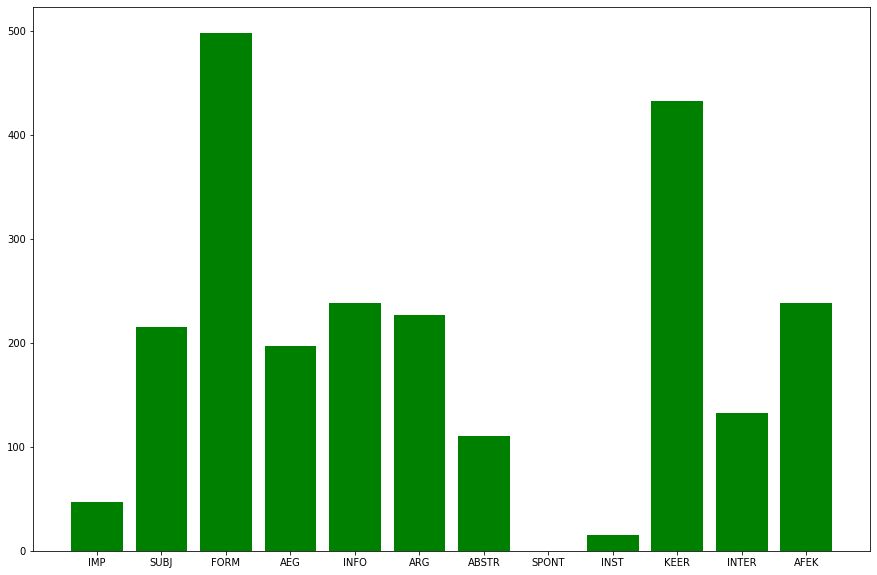

In [4]:
# find_sums(data)
dim_info = find_sums(data)
print(dim_info)

plt.rcParams["figure.figsize"] = (15, 10)
plt.bar([el[0] for el in dim_info], [el[1] for el in dim_info], color = 'green')

In [5]:
all_df = pd.read_csv('Brown_annot.csv')
all_df.drop(['SPONT'], axis=1)

,FAILI_ID,BROWN KAT,ABSTR,AFEK,INST,INFO,FORM,IMP,AEG,INTER,SUBJ,KEER,ARG
0,1,adventure,0,1,0,0,1,0,1,1,0,1,0
1,2,adventure,0,1,0,0,1,0,1,1,0,1,0
2,3,adventure,0,1,0,0,1,0,1,1,0,0,0
3,4,adventure,0,1,0,0,1,0,1,1,0,0,0
4,5,adventure,0,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,science_fiction,0,1,0,1,1,0,1,1,0,1,0
496,497,science_fiction,0,1,0,0,1,0,0,1,0,1,0
497,498,science_fiction,0,1,0,0,1,0,1,1,0,1,0
498,499,science_fiction,0,1,0,0,1,0,1,1,0,1,0


##### CONTINGENCY TABLES JA 'KORRELATSIOONID'

##### Tetrachoric Correlation ehk https://en.wikipedia.org/wiki/Polychoric_correlation  (Tetrachoric correlation is a special case of the polychoric correlation applicable when both observed variables are dichotomous) ja valem on siit: https://www.statology.org/tetrachoric-correlation/

-1 kuni 1
kala: 


In [6]:
dim_ls = ['IMP', 'AEG', 'KEER', 'INST', 'INTER', 'ARG', 'AFEK', 'INFO', 'SUBJ', 'FORM', 'ABSTR'] 

dimension_pairs = [list(pair) for pair in itertools.combinations(dim_ls, 2)]
# for pair in dimension_pairs:
#     print(pair)

In [7]:
def generate_confusion_matrix(dim_pair):
    return pd.crosstab(index=all_df[dim_pair[0]], columns=all_df[dim_pair[1]])

In [8]:
def calculate_tet_score(a, b, c, d):
    """
    r_tet = cos(pi/(1 + √((A*D)/(B*C)))
    
    Lähtusin artiklist "Inferential Methods for the Tetrachoric Correlation Coefficient" (2005 Price, Bonett)
    link: https://sci-hub.se/10.3102/10769986030002213)
    
    """

#     print(a, b, c, d)
    
#     return math.cos(math.pi/(1 + math.sqrt(a*d/(b/c))))
    return cos(pi/(1 + sqrt((a*d)/(b*c))))


In [9]:
tet_table = pd.DataFrame(columns=dim_ls, index=dim_ls)
for pair in dimension_pairs:
#     print(pair)
    index = pair[0]
    column = pair[1]

    
    mtrx = generate_confusion_matrix(pair)
    a = mtrx[0][0] + 0.5
    c = mtrx[0][1] + 0.5
    b = mtrx[1][0] + 0.5
    d = mtrx[1][1] + 0.5
    score = calculate_tet_score(a, b, c, d)

    tet_table.at[index, index] = float(1)
    tet_table.at[index, column] = round(score,2)
tet_table.at[dim_ls[-1], dim_ls[-1]] = float(1)
tet_table

,IMP,AEG,KEER,INST,INTER,ARG,AFEK,INFO,SUBJ,FORM,ABSTR
IMP,1.0,-0.35,0.18,0.23,-0.91,0.17,-0.96,0.73,-0.4,-0.25,0.88
AEG,NaN,1.0,0.01,0.02,0.54,-0.57,0.34,-0.22,-0.47,-0.17,-0.59
KEER,NaN,NaN,1.0,-0.62,-0.01,0.04,0.08,0.08,-0.03,0.1,0.24
INST,NaN,NaN,NaN,1.0,-0.76,0.02,-0.57,0.4,0.06,-0.62,-0.01
INTER,NaN,NaN,NaN,NaN,1.0,-0.9,0.96,-0.91,-0.8,-0.38,-0.96
ARG,NaN,NaN,NaN,NaN,NaN,1.0,-0.64,0.43,0.72,0.51,0.54
AFEK,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.8,-0.22,-0.04,-0.73
INFO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.15,-0.04,0.49
SUBJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.11,0.16
FORM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.14


In [10]:
def _calculate_ps(f_11, f_12, f_21, f_22):
    total = f_11 + f_12 + f_21 + f_22
    p_11 = (f_11 / total) + 0.5
    p_12 = (f_12 / total) + 0.5
    p_21 = (f_21 / total) + 0.5
    p_22 = (f_22 / total) + 0.5
    return p_11, p_12, p_21, p_22


def tetrachoric_approximation(f_11, f_12, f_21, f_22) -> float:
    p_11, p_12, p_21, p_22 = _calculate_ps(f_11, f_12, f_21, f_22)
    p_1p = p_11 + p_12
    p_p1 = p_11 + p_21
    p_min = min(p_11, p_12, p_21, p_22)

    c_hat = (1 - abs(p_1p - p_p1) / 5 - (0.5 - p_min)**2) / 2
    omega_hat = (f_11 + 0.5) * (f_22 + 0.5) / ((f_12 + 0.5) * (f_21 + 0.5))
    return cos(pi / (1 + omega_hat ** c_hat))

In [11]:
tet_table = pd.DataFrame(columns=dim_ls, index=dim_ls)
for pair in dimension_pairs:
#     print(pair)
    index = pair[0]
    column = pair[1]

    
    mtrx = generate_confusion_matrix(pair)
    a = mtrx[0][0] + 0.5
    c = mtrx[0][1] + 0.5
    b = mtrx[1][0] + 0.5
    d = mtrx[1][1] + 0.5
#     score = calculate_tet_score(a, b, c, d)
    score = tetrachoric_approximation(a, b, c, d)

    tet_table.at[index, index] = float(1)
    tet_table.at[index, column] = round(score,2)
tet_table.at[dim_ls[-1], dim_ls[-1]] = float(1)
tet_table

,IMP,AEG,KEER,INST,INTER,ARG,AFEK,INFO,SUBJ,FORM,ABSTR
IMP,1.0,-0.32,0.12,0.27,-0.83,0.16,-0.91,0.68,-0.37,-0.35,0.87
AEG,NaN,1.0,0.01,0.03,0.52,-0.55,0.32,-0.21,-0.46,-0.15,-0.56
KEER,NaN,NaN,1.0,-0.54,-0.02,0.03,0.07,0.07,-0.03,0.28,0.2
INST,NaN,NaN,NaN,1.0,-0.59,0.02,-0.49,0.35,0.06,-0.63,0.03
INTER,NaN,NaN,NaN,NaN,1.0,-0.88,0.94,-0.89,-0.78,-0.33,-0.93
ARG,NaN,NaN,NaN,NaN,NaN,1.0,-0.63,0.41,0.71,0.31,0.52
AFEK,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.8,-0.21,-0.03,-0.69
INFO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.14,-0.03,0.46
SUBJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.1,0.15
FORM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.05


#### Cramer's V (https://samm.ut.ee/risttabelid-ja-seosekordajad): 

is used to understand the strength of the relationship between two nominal variables.

skoor vahemikus 0 kuni 1

In [ ]:
# import scipy.stats as ss

# def stat(confusion_matrix):
#     chi2 = ss.chi2_contingency(confusion_matrix)
#     chi_square = chi2[0]
#     n = confusion_matrix.sum()
#     cramer =  np.sqrt(chi_square / (n*(min(confusion_matrix.shape)-1)))
#     return cramer

In [ ]:
# for pair in dimension_pairs:
#     mtrx = generate_confusion_matrix(pair)
#     cramer_score = stat(mtrx.to_numpy())
#     print(f'Dimensioonid {pair}')
#     print(f'cramer v {cramer_score}')
#     print(f'========================================')

Kuna sellel andmestikul on Cramer V degree of freedom 1, siis sellisel juhul
1) väärtus > 0.1 on nõrk seos

2) väärtus > 0.3 on keskmine seos

3) väärtus > 0.5 on tugev(am) seos


Niisis on tabelis rasvaselt kõik 1), 2) ja 3)

<!-- ![tabel_2.png](attachment:tabel_2.png) -->

In [12]:
BROWN_CATS = ['adventure', 'science_fiction', 'romance', 'reviews', 'religion', 'news', 'mystery', 'lore', 'learned', 'humor', 'hobbies', 'government', 'fiction', 'editorial', 'belles_lettres']

cat_subset = all_df[['BROWN KAT', 'IMP', 'AEG', 'KEER', 'INST', 'INTER', 'ARG', 'AFEK', 'INFO', 'SUBJ', 'FORM', 'ABSTR']]

In [13]:
print(f'\n\n\nDIMENSIOONIDE JAOTUMINE BROWNI KATGEOORIATES:')

cat_dict = {}
for category in BROWN_CATS:
#     print(category)
    cat_dict[f'{category}'] = cat_subset.loc[cat_subset['BROWN KAT'] == category].drop(['BROWN KAT'], axis=1).sum()

#     adventure = cat_subset.loc[subset['BROWN KAT']== 'adventure'].drop(['BROWN KAT'], axis=1).sum()
cat_df = pd.DataFrame(cat_dict)
cat_df




DIMENSIOONIDE JAOTUMINE BROWNI KATGEOORIATES:


,adventure,science_fiction,romance,reviews,religion,news,mystery,lore,learned,humor,hobbies,government,fiction,editorial,belles_lettres
IMP,0,0,0,0,0,0,0,1,36,0,0,9,0,0,1
AEG,21,3,15,2,5,22,21,17,14,2,7,15,20,4,29
KEER,23,6,24,16,12,35,19,43,73,8,26,22,26,26,74
INST,0,0,0,0,0,0,0,2,2,0,10,1,0,0,0
INTER,28,6,26,0,0,1,23,3,1,5,0,0,26,5,9
ARG,0,0,0,11,13,20,0,26,58,3,19,16,0,23,38
AFEK,29,6,29,12,5,7,24,17,12,8,12,2,29,14,32
INFO,0,1,0,12,9,37,0,30,60,1,25,24,0,16,23
SUBJ,1,0,0,17,11,19,0,25,36,4,21,11,0,24,46
FORM,29,6,29,17,17,44,24,48,80,9,36,30,28,27,74


In [14]:
texts_per_category = cat_subset['BROWN KAT'].value_counts()
print(texts_per_category)

learned            80
belles_lettres     75
lore               48
news               44
hobbies            36
government         30
fiction            29
adventure          29
romance            29
editorial          27
mystery            24
religion           17
reviews            17
humor               9
science_fiction     6
Name: BROWN KAT, dtype: int64


In [15]:
def calculate_tet_score(a, b, c, d):
    a = a + 0.5
    c = c + 0.5
    b = b + 0.5
    d = d + 0.5
    return round(cos(pi/(1 + sqrt((a*d)/(b*c)))), 3)

In [25]:
def get_dimension_info(row):
    dim_name = row.name
#     print(dim_name)
    dim_texts_total = row.sum()
    for cat_nr in zip(row.index, row.values):
        category = cat_nr[0]
        annotated_texts_per_row_category = cat_nr[1]
#         print(category, annotated_texts_per_row_category)
        
        d = annotated_texts_per_row_category
        c = dim_texts_total - d
        b = texts_per_category[category] - d
        a = 500 - (b + d) - c

#         
        tet_score = calculate_tet_score(a, b, c, d) # vana korrelatsioon
        tet_score = tetrachoric_approximation(a, b, c, d) # uus korrelatsioon
#         print(f'a: {a},b: {b},c: {c},d: {d}')
#         print(tet_score)
        category_dim_correlation_df.at[dim_name, category] = round(tet_score,2)
        

In [24]:
category_dim_correlation_df = pd.DataFrame(columns=cat_df.columns, index=dim_ls)


for i in range(len(cat_df.index)): 
    get_dimension_info(cat_df.iloc[i])


print('VANA')    
category_dim_correlation_df

VANA


,adventure,science_fiction,romance,reviews,religion,news,mystery,lore,learned,humor,hobbies,government,fiction,editorial,belles_lettres
IMP,-0.64,-0.13,-0.64,-0.48,-0.48,-0.73,-0.59,-0.47,0.88,-0.27,-0.69,0.56,-0.64,-0.62,-0.62
AEG,0.52,0.17,0.2,-0.52,-0.16,0.18,0.74,-0.07,-0.46,-0.26,-0.38,0.18,0.47,-0.47,-0.01
KEER,-0.24,0.28,-0.15,0.22,-0.41,-0.23,-0.24,0.09,0.19,-0.05,-0.39,-0.36,0.07,0.4,0.71
INST,-0.27,0.33,-0.27,-0.06,-0.06,-0.42,-0.19,0.22,-0.01,0.19,0.89,0.18,-0.27,-0.24,-0.6
INTER,0.94,0.9,0.87,-0.78,-0.78,-0.76,0.93,-0.58,-0.86,0.46,-0.88,-0.86,0.87,-0.16,-0.4
ARG,-0.93,-0.75,-0.93,0.3,0.48,0.0,-0.92,0.15,0.49,-0.17,0.12,0.13,-0.93,0.65,0.1
AFEK,0.95,0.8,0.95,0.36,-0.29,-0.57,0.94,-0.21,-0.63,0.63,-0.24,-0.76,0.95,0.07,-0.09
INFO,-0.94,-0.45,-0.94,0.36,0.08,0.63,-0.92,0.25,0.5,-0.58,0.36,0.54,-0.94,0.19,-0.32
SUBJ,-0.81,-0.73,-0.93,0.93,0.34,0.01,-0.91,0.16,0.04,0.03,0.25,-0.1,-0.93,0.73,0.33
FORM,-0.43,-0.8,-0.43,-0.59,-0.59,-0.27,-0.49,-0.24,-0.01,-0.73,-0.35,-0.42,-0.81,-0.45,-0.6


In [26]:
category_dim_correlation_df = pd.DataFrame(columns=cat_df.columns, index=dim_ls)


for i in range(len(cat_df.index)): 
    get_dimension_info(cat_df.iloc[i])

print('UUS')
category_dim_correlation_df

UUS


,adventure,science_fiction,romance,reviews,religion,news,mystery,lore,learned,humor,hobbies,government,fiction,editorial,belles_lettres
IMP,-0.63,-0.12,-0.63,-0.48,-0.48,-0.73,-0.58,-0.47,0.88,-0.27,-0.69,0.56,-0.63,-0.61,-0.61
AEG,0.49,0.16,0.19,-0.48,-0.15,0.17,0.7,-0.06,-0.44,-0.24,-0.35,0.17,0.44,-0.44,-0.01
KEER,-0.2,0.23,-0.13,0.18,-0.34,-0.2,-0.2,0.08,0.17,-0.04,-0.33,-0.31,0.06,0.34,0.64
INST,-0.27,0.33,-0.27,-0.06,-0.06,-0.42,-0.19,0.21,-0.02,0.19,0.89,0.18,-0.27,-0.24,-0.59
INTER,0.93,0.89,0.85,-0.76,-0.76,-0.74,0.92,-0.56,-0.86,0.43,-0.87,-0.85,0.85,-0.16,-0.39
ARG,-0.91,-0.71,-0.91,0.27,0.45,0.0,-0.89,0.14,0.46,-0.16,0.11,0.12,-0.91,0.61,0.09
AFEK,0.93,0.75,0.93,0.33,-0.26,-0.54,0.91,-0.19,-0.6,0.59,-0.22,-0.72,0.93,0.06,-0.08
INFO,-0.91,-0.41,-0.91,0.33,0.08,0.59,-0.9,0.23,0.47,-0.54,0.33,0.5,-0.91,0.17,-0.29
SUBJ,-0.77,-0.69,-0.9,0.9,0.31,0.0,-0.89,0.15,0.04,0.03,0.24,-0.1,-0.9,0.7,0.31
FORM,-0.35,-0.7,-0.35,-0.5,-0.5,-0.23,-0.41,-0.2,-0.01,-0.63,-0.29,-0.34,-0.72,-0.38,-0.52
